# ***1)*** ***Insert*** ***Dataset***

In [ ]:
!pip3 install -U ucimlrepo

# ***2) Read Dataset***

In [ ]:
# From website
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

# 3)  ***Handle missing values***

In [ ]:
# handling missing values
import pandas as pd

# Select only numeric columns for handling missing values
X_numeric = X.select_dtypes(include=['number'])

# Fill missing values with the mean of each column
df_filled = X_numeric.fillna(X_numeric.mean())

display(df_filled.head())

# handling duplicates (using the filled DataFrame)
print(f"Number of duplicates before dropping: {df_filled.duplicated().sum()}")
df_processed = df_filled.drop_duplicates()
print(f"Number of duplicates after dropping: {df_processed.duplicated().sum()}")
display(df_processed.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


Number of duplicates before dropping: 0
Number of duplicates after dropping: 0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


# ***3) Data Encoding***

In the larger context of Python Data Encoding for Machine Learning, the sources clearly state the fundamental purpose of data encoding.
The primary purpose of data encoding is that it is a crucial step in preparing data for machine learning models. This necessity arises because most machine learning algorithms cannot directly handle categorical (non-numeric) data.

Therefore, data encoding techniques are employed to transform these non-numeric categorical variables into a numerical format that algorithms can understand and process effectively. By performing this transformation, you can effectively prepare your categorical data for machine learning models in Python.

• 1. One-Hot Encoding:

◦ Concept: This method creates a new binary (0 or 1) column for each unique category within a feature. If a data point belongs to a specific category, its corresponding new column receives a 1, while all other new columns for that feature get a 0.

◦ When to Use: It is suitable for nominal categorical variables where there is no inherent order (e.g., colors like 'Red', 'Blue', 'Green').

◦ Pros and Cons:
▪ Pros: Prevents the machine learning model from assuming an arbitrary ordinal relationship between categories, and it works well with most models.

▪ Cons: Can lead to a high-dimensional dataset (known as the curse of dimensionality) if there are many unique categories, especially problematic with tree-based models.

◦ Best For: Nominal categorical features with a relatively low number of unique categories.




  ◦ Python Implementation:

  ▪ Using pandas.get_dummies(): This is described as a simpler method for quick encoding. For example, pd.get_dummies(df, columns=['City'], prefix='City') can transform a 'City' column.

  ▪ Using scikit-learn.preprocessing.OneHotEncoder: This is recommended for better integration into pipelines and consistency. It can be used within a ColumnTransformer to apply encoding only to specified categorical columns. A key parameter, handle_unknown='ignore', is highlighted for gracefully managing new, unseen categories in test or production data by encoding them as all zeros.

In [ ]:
# Data encoding (One-hot encoding)
encoded_df= pd.get_dummies(X)
# Display
display(encoded_df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


# 4) Standerdization

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create a sample DataFrame with numeric values for demonstration purposes
df = encoded_df

# Display the original unscaled data to the user
display(df.head())

# Initialize the StandardScaler, which standardizes data to zero mean and unit variance
scaler_std = StandardScaler()

# Apply StandardScaler: fit to data and transform it
df_std = pd.DataFrame(scaler_std.fit_transform(df), columns=df.columns)

# Display standardized data
# tools.display_dataframe_to_user("StandardScaler Output", df_std)
display(df_std.head())

# Initialize the MinMaxScaler, which scales data to the range [0, 1]
scaler_mm = MinMaxScaler()

# Apply MinMaxScaler: fit to data and transform it
df_mm = pd.DataFrame(scaler_mm.fit_transform(df), columns=df.columns)

# Display MinMax scaled data
# tools.display_dataframe_to_user("MinMaxScaler Output", df_mm)
display(df_mm.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.718306,0.653650
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.487269,-0.895552
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.418744,1.170051
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.718306,-0.895552
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.718306,-0.895552


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00


# **EDA : Exploratory Data Analysis**

In [ ]:
#checking stats
print(X['age'].describe())
print(X['age'].unique())
#trestbps stats
print (X['trestbps'].describe())
print(X['trestbps'].unique())
#cholesterol stats
print(X['chol'].describe())
print(X['chol'].unique())

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64
[63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76]
count    303.000000
mean     131.689769
std       17.599748
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64
[145 160 120 130 140 172 150 110 132 117 135 112 105 124 125 142 128 170
 155 104 180 138 108 134 122 115 118 100 200  94 165 102 152 101 126 174
 148 178 158 192 129 144 123 136 146 106 156 154 114 164]
count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: chol, dtype: float64
[233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275
 266 211 283 284 224 206 219 340 

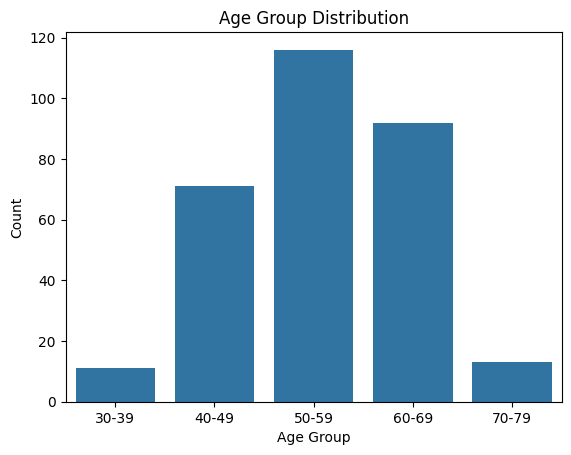

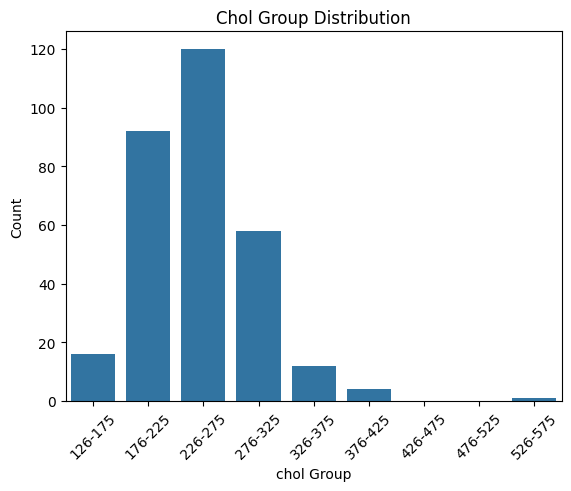

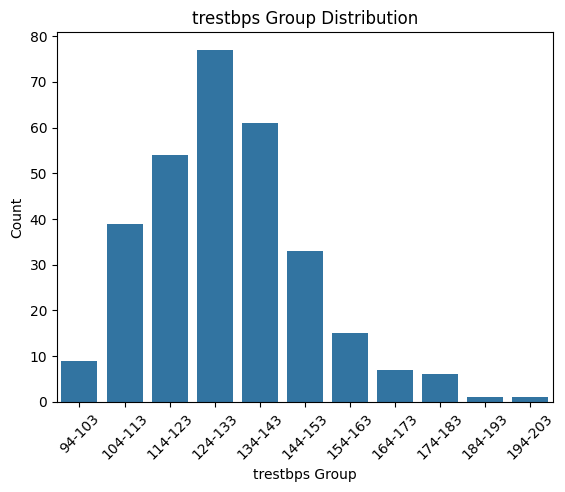

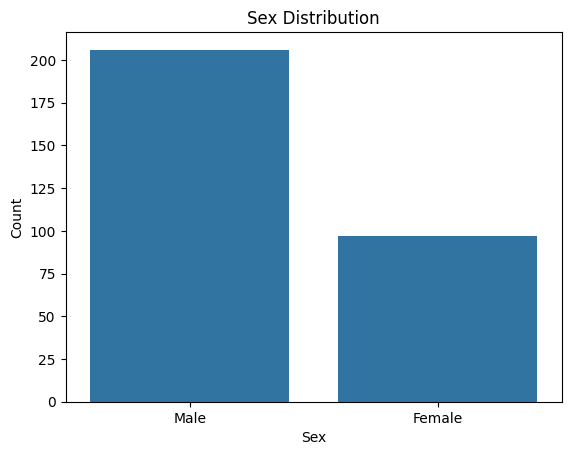

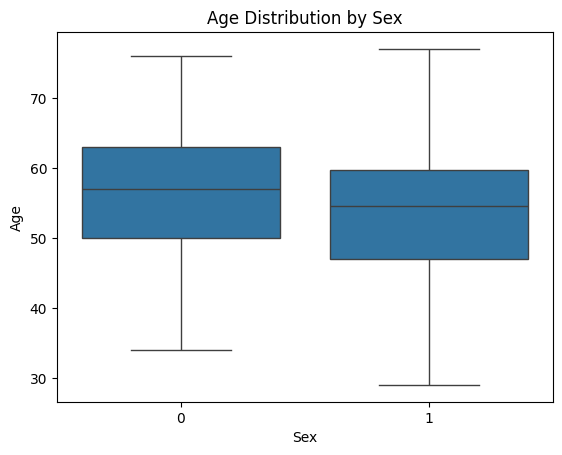

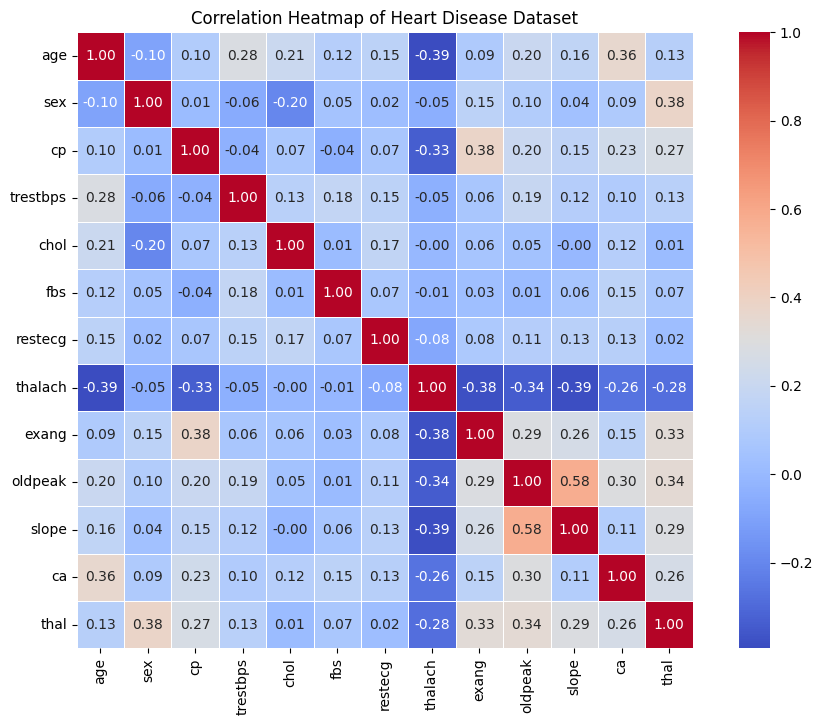

In [ ]:
# 1. Histograms (Age) (sorted in bins)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define age bins and labels
age_bins = [29, 39, 49, 59, 69, 79]
age_labels = ['30-39', '40-49', '50-59', '60-69', '70-79']

# Create age group column (using the original X DataFrame)
# right=False means that the right edge is not included (e.g., 30–39 includes 30 but not 39).
X['age_group'] = pd.cut(X['age'], bins=age_bins, labels=age_labels, right=False)

# Plot age group counts
sns.countplot(x='age_group', data=X, order=age_labels)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# chol histograms
chol_bins = [126, 176, 226, 276, 326, 376 , 426 ,476 ,526 ,576]
chol_labels = ['126-175', '176-225', '226-275', '276-325', '326-375' , '376-425' ,'426-475' ,'476-525' ,'526-575']


# Create chol group column (using the original X DataFrame)
# right=False means that the right edge is not included (e.g., 30–39 includes 30 but not 39).
X['chol_group'] = pd.cut(X['chol'], bins= chol_bins, labels=chol_labels, right=False)

# Plot chol group counts
sns.countplot(x='chol_group', data=X, order=chol_labels)
plt.title('Chol Group Distribution')
plt.xlabel('chol Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# trestbps histograms
trestbps_bins = [94, 104, 114, 124, 134, 144 , 154 ,164 ,174 ,184 ,194 ,204]
trestbps_labels = ['94-103', '104-113', '114-123', '124-133', '134-143', '144-153', '154-163', '164-173', '174-183', '184-193', '194-203']


# Create trestbps group column (using the original X DataFrame)
# right=False means that the right edge is not included (e.g., 30–39 includes 30 but not 39).
X['trestbps_group'] = pd.cut(X['trestbps'], bins=trestbps_bins, labels=trestbps_labels, right=False)

# Plot chol group counts
sns.countplot(x='trestbps_group', data=X, order=trestbps_labels)
plt.title('trestbps Group Distribution')
plt.xlabel('trestbps Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 2. "Sex" counts and turning them into readable insights
import seaborn as sns
import matplotlib.pyplot as plt
# Optional: map sex values to readable labels (using the original X DataFrame)
X['sex_label'] = X['sex'].map({0: 'Female', 1: 'Male'})
# Plot using countplot (like a histogram for categorical data)
sns.countplot(x='sex_label', data=X)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# 3. Boxplot of age distribution by sex
sns.boxplot(x='sex', y='age', data=df)
plt.title('Age Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

# 4. Compute correlation matrix (numeric variables only)
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

# 5. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Heart Disease Dataset')
plt.show()

**PCA: Principle Component Analysis**

In [ ]:
# 1. Standardize the Data
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for handling missing values and scaling
X_numeric = X.select_dtypes(include=['number'])

# Fill missing values with the mean of each column
df_filled = X_numeric.fillna(X_numeric.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filled)

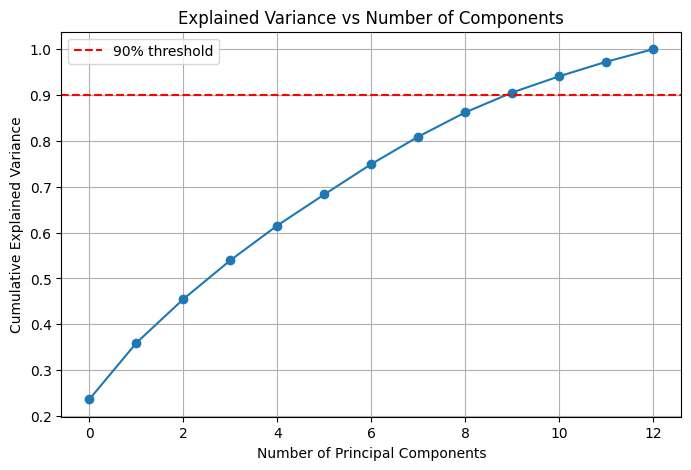

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assume X_scaled is your standardized data
pca = PCA()
pca.fit(X_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% threshold')
plt.legend()
plt.show()


**Therefore, 4 principal componenets are optimal using the explained variance ratio**

Explained variance ratio:
[0.23668957 0.12299426 0.09541984 0.08457844 0.07585103 0.0677347
 0.06620699 0.05977317 0.05295412 0.04339731 0.03532078 0.03165649
 0.02742331]

First two PCA components:


array([[ 1.16116986, -0.94644829],
       [ 3.20664693, -1.45579607],
       [ 3.13979177,  0.63378813],
       [-0.47043545,  1.39407983],
       [-2.27741975, -0.38557256],
       [-2.20798579,  0.33114018],
       [ 1.95189778, -1.76141033],
       [-0.7182346 , -0.91828103],
       [ 1.39270571,  0.01468697],
       [ 2.72122637,  0.95296868],
       [ 0.02321016,  1.11837406],
       [-0.68701544, -1.90733814],
       [ 1.45409573, -0.09823628],
       [-2.01028854,  1.19346758],
       [-0.48842097, -0.10250767],
       [-1.37102283,  0.41367608],
       [-0.45724922,  1.82162348],
       [-1.03696588,  0.32534955],
       [-1.78284167, -0.61326412],
       [-2.23205602,  0.18849962],
       [ 0.12191983,  0.37776402],
       [-1.44678286, -2.97487724],
       [-0.53545565, -0.50449149],
       [ 0.82613403,  0.05633742],
       [ 2.85337515,  0.9226038 ],
       [-1.18032083,  0.14268707],
       [-2.08072368, -1.48906585],
       [ 0.6936563 , -1.3536924 ],
       [-1.36200017,

          PC1       PC2
0    1.161170 -0.946448
1    3.206647 -1.455796
2    3.139792  0.633788
3   -0.470435  1.394080
4   -2.277420 -0.385573
..        ...       ...
298 -0.682629  1.466382
299  2.622549 -0.053480
300  1.880752  2.380562
301 -1.325611 -1.510916
302 -2.382652  1.310690

[303 rows x 2 columns]


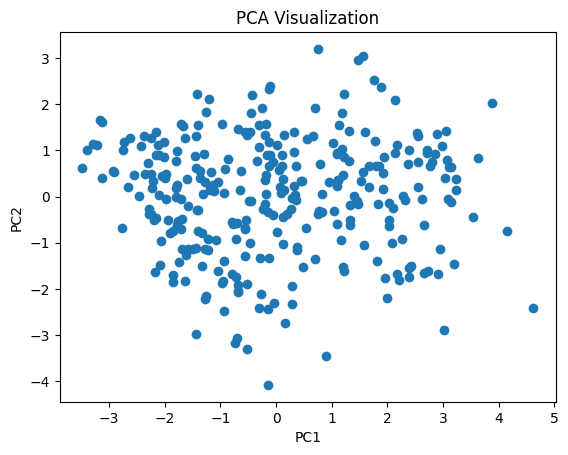

In [ ]:
# 4. Perform PCA
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Display the explained variance ratio
print("Explained variance ratio:")
print(pca.explained_variance_ratio_)

# Display the first two PCA components
print("\nFirst two PCA components:")
display(X_pca[:, :2])

import pandas as pd
pca_df = pd.DataFrame(data=X_pca[:, :2], columns=['PC1', 'PC2'])
print(pca_df)

# Visualisation
import matplotlib.pyplot as plt

plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization')
plt.show()

Explained variance ratio:
[0.23668957 0.12299426 0.09541984 0.08457844 0.07585103 0.0677347
 0.06620699 0.05977317 0.05295412 0.04339731 0.03532078 0.03165649
 0.02742331]

First two PCA components:
        PC1       PC2  Category
0  1.161170 -0.946448         0
1  3.206647 -1.455796         2
2  3.139792  0.633788         1
3 -0.470435  1.394080         0
4 -2.277420 -0.385573         0


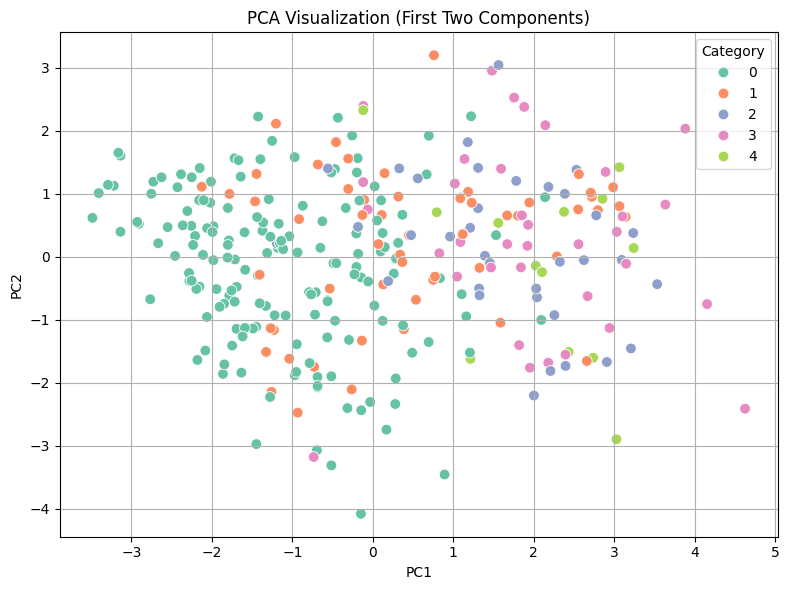

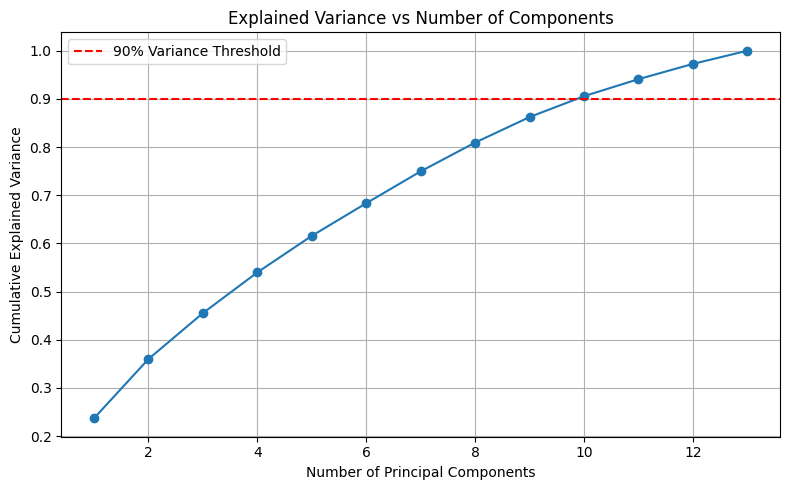

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load your dataset ---
# For example: df = pd.read_csv('your_data.csv')
# Assume your features are in X and labels in y

# Example:
# X = df.drop("Category", axis=1)
# y = df["Category"]

# Select only numeric columns
X_numeric = X.select_dtypes(include=[np.number])

# --- Step 2: Handle missing values ---
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' if preferred
X_imputed = imputer.fit_transform(X_numeric)

# --- Step 3: Standardize the features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# --- Step 4: Apply PCA (all components) ---
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# --- Step 5: Print explained variance ratio ---
print("Explained variance ratio:")
print(pca.explained_variance_ratio_)

# --- Step 6: Display first two components ---
print("\nFirst two PCA components:")
pca_df = pd.DataFrame(data=X_pca[:, :2], columns=['PC1', 'PC2'])
# Ensure the length of y matches the imputed X data before adding the category
if len(y) == len(X_imputed):
    pca_df["Category"] = y.values.flatten()  # Add back the category labels
    print(pca_df.head())
else:
    print("Warning: Length of y does not match the imputed X data. Skipping category assignment for visualization.")
    print(pca_df.head())


# --- Step 7: Visualize the PCA Scatter Plot ---
if "Category" in pca_df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Category", palette="Set2", s=60)
    plt.title("PCA Visualization (First Two Components)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.legend(title="Category")
    plt.tight_layout()
    plt.show()
else:
    print("Skipping scatter plot visualization as category labels could not be added.")


# --- Step 8: Cumulative Explained Variance Plot ---
pca_full = PCA()
pca_full.fit(X_scaled)

plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(pca_full.explained_variance_ratio_) + 1),
    np.cumsum(pca_full.explained_variance_ratio_),
    marker='o'
)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance Threshold')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# **3.** **Feature  Selection:**

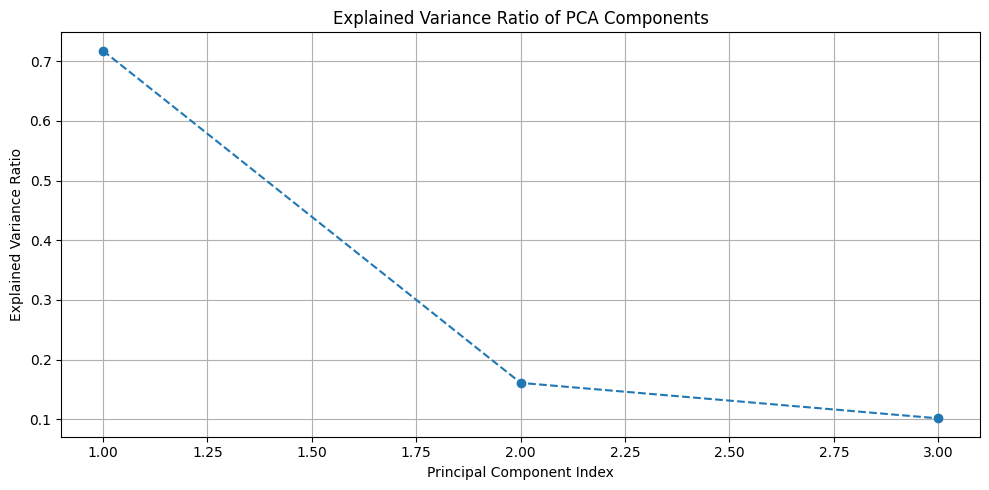

Number of PCA components selected by Random Forest: 1


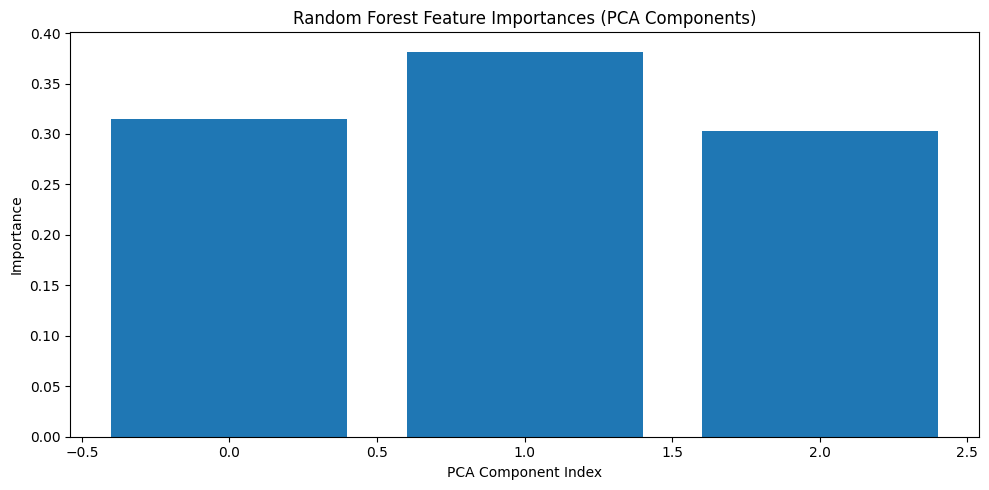

Number of PCA components selected by XGBoost: 2


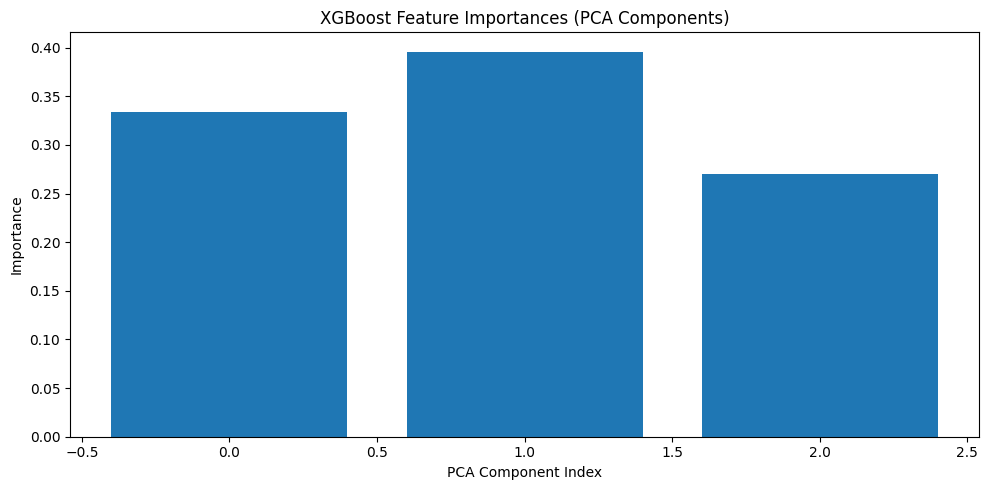

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Dataset loading
from ucimlrepo import fetch_ucirepo

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Data preparation
X = heart_disease.data.features
y = heart_disease.data.targets.values.ravel()

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=0.95)  # retains 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualize explained variance by each component
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio of PCA Components')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

# Random Forest for Feature Selection on PCA results
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)

# Select important PCA features using Random Forest
selector_rf = SelectFromModel(rf, prefit=True)
X_train_rf = selector_rf.transform(X_train_pca)
X_test_rf = selector_rf.transform(X_test_pca)

print("Number of PCA components selected by Random Forest:", X_train_rf.shape[1])

# Visualize Random Forest feature importances
plt.figure(figsize=(10, 5))
plt.bar(range(X_train_pca.shape[1]), rf.feature_importances_)
plt.title('Random Forest Feature Importances (PCA Components)')
plt.xlabel('PCA Component Index')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# XGBoost for Feature Selection on PCA results
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train_pca, y_train)

# Select important PCA features using XGBoost
selector_xgb = SelectFromModel(xgb, prefit=True)
X_train_xgb = selector_xgb.transform(X_train_pca)
X_test_xgb = selector_xgb.transform(X_test_pca)

print("Number of PCA components selected by XGBoost:", X_train_xgb.shape[1])

# Visualize XGBoost feature importances
plt.figure(figsize=(10, 5))
plt.bar(range(X_train_pca.shape[1]), xgb.feature_importances_)
plt.title('XGBoost Feature Importances (PCA Components)')
plt.xlabel('PCA Component Index')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


# **Therefore, PC1 seems to have the highest importance illustratred from the tables above!**

# **What features are contributting to PC1?**

In [ ]:
# Get original feature names
original_feature_names = heart_disease.data.features.columns

# Get PCA components (each row is a principal component, each column is an original feature)
pca_components = pca.components_

# Convert to DataFrame for readability
pca_df = pd.DataFrame(pca_components, columns=original_feature_names)

# Show the contribution of original features to each principal component
print(pca_df)

# OPTIONAL: Show top features contributing to PC1 (2nd component)
pc1_contributions = pca_df.iloc[1]  # PC1 is the 2nd row
top_features_pc1 = pc1_contributions.abs().sort_values(ascending=False).head(5)
print("Top contributing features to PC1:")
print(top_features_pc1)


        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.035589 -0.001493  0.001215  0.054425  0.997848 -0.000072  0.003678   
1 -0.198789 -0.000652 -0.013692 -0.101977  0.019270 -0.000074 -0.005674   
2  0.132929 -0.000377 -0.005851  0.980438 -0.057375  0.003636  0.007681   

    thalach     exang   oldpeak     slope        ca      thal  
0 -0.006700  0.000587  0.000379 -0.000301  0.002871  0.000342  
1  0.973878 -0.007354 -0.017729 -0.010369 -0.009268 -0.022189  
2  0.131512 -0.000210  0.010982  0.003354  0.003926  0.015152  
Top contributing features to PC1:
thalach     0.973878
age         0.198789
trestbps    0.101977
thal        0.022189
chol        0.019270
Name: 1, dtype: float64


# **RFE: Recursive Feature Elimination (RFE):**

In [35]:
# ==========================
# 1. Import Required Libraries
# ==========================
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report

# ==========================
# 2. Load the UCI Heart Disease Dataset
# ==========================
heart_disease = fetch_ucirepo(id=45)

# Features and Target
X = heart_disease.data.features.copy()
y = heart_disease.data.targets.copy()

# Convert target to Series if it's a DataFrame
if isinstance(y, pd.DataFrame):
    y = y.iloc[:, 0]

# ==========================
# 3. Handle Missing Values
# ==========================

# Check for missing values
print("\nMissing values per column:")
print(X.isna().sum())

# Impute numerical missing values with the mean
num_imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(num_imputer.fit_transform(X), columns=X.columns)

# ==========================
# 4. Encode Categorical Columns if Any
# ==========================

# If there are categorical columns, encode them
for col in X_imputed.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_imputed[col] = le.fit_transform(X_imputed[col])

# ==========================
# 5. Preprocess for Feature Selection
# ==========================

# Chi-Square requires non-negative values → use MinMaxScaler
X_chi2 = MinMaxScaler().fit_transform(X_imputed)

# RFE works better with standard scaling
X_scaled = StandardScaler().fit_transform(X_imputed)

# Split data (use same random_state for consistent comparison)
X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

X_train_chi2, X_test_chi2, _, _ = train_test_split(
    X_chi2, y, test_size=0.2, random_state=42
)

# ==========================
# 6. Apply Recursive Feature Elimination (RFE)
# ==========================

# Use Logistic Regression as estimator
model = LogisticRegression(max_iter=1000)

# Use RFE to select top 10 features
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train_rfe, y_train)

# Get selected features by RFE
rfe_features = X_imputed.columns[rfe.support_]
print("\n🔍 Top 10 features selected by RFE:")
print(rfe_features.tolist())

# ==========================
# 7. Apply Chi-Square Test
# ==========================

# Select top 10 features based on chi-square scores
chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X_train_chi2, y_train)

chi2_features = X_imputed.columns[chi2_selector.get_support()]
print("\n📊 Top 10 features selected by Chi-Square Test:")
print(chi2_features.tolist())

# ==========================
# 8. Combine Selected Features
# ==========================

# You can choose either:
# final_features = list(set(rfe_features) | set(chi2_features))   # Union
final_features = list(set(rfe_features) & set(chi2_features))      # Intersection
print(f"\n✅ Final selected features for modeling ({len(final_features)} features):")
print(final_features)

# ==========================
# 9. Train Model on Final Features
# ==========================

# Map final feature names to column indices
selected_indices = [X_imputed.columns.get_loc(col) for col in final_features]

# Slice data to only include selected features
X_final_train = X_train_rfe[:, selected_indices]
X_final_test = X_test_rfe[:, selected_indices]

# Train and evaluate model
model.fit(X_final_train, y_train)
y_pred = model.predict(X_final_test)

print("\n🎯 Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

🔍 Top 10 features selected by RFE:
['age', 'sex', 'cp', 'trestbps', 'fbs', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']

📊 Top 10 features selected by Chi-Square Test:
['sex', 'cp', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

✅ Final selected features for modeling (8 features):
['oldpeak', 'slope', 'thalach', 'fbs', 'thal', 'sex', 'cp', 'ca']

🎯 Model Evaluation:
Accuracy: 0.4918032786885246
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.22      0.17      0.19        12
           2       0.00      0.00      0.00         9
           3       0.13      0.29      0.18         7
           4       0.00      0.00      0.00         4

    accuracy              

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Supervised Learning:**

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 2: Inspect the dataset (optional)
# print(df.head()) # df is not used for splitting, so this line is not needed
# print(df.columns) # df is not used for splitting, so this line is not needed

# Step 3: Define features and label
# X and y are already defined in previous cells

# Step 4: Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Step 5: Check the sizes
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (242, 13)
Testing data shape: (61, 13)


# **Logistic Regression:**

In [41]:
pip install ucimlrepo pandas scikit-learn matplotlib seaborn



📊 Evaluation Metrics:
Accuracy  : 0.8333
Precision : 0.8462
Recall    : 0.7857
F1-score  : 0.8148

📝 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



/tmp/ipython-input-2907205401.py:96: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


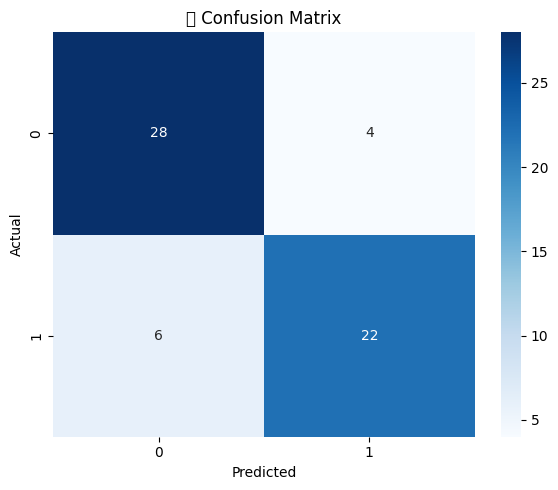

/tmp/ipython-input-2907205401.py:113: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


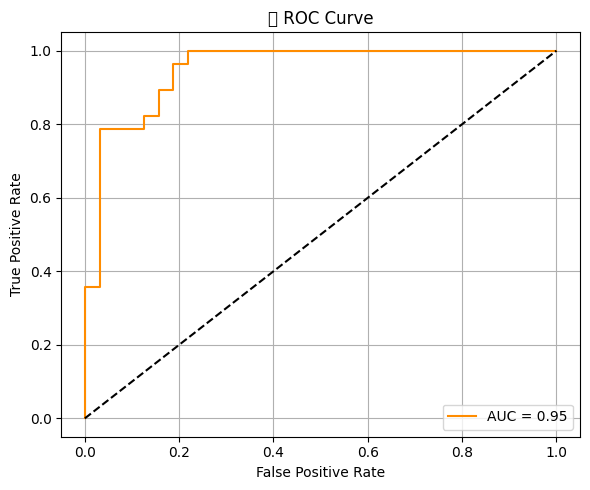

/tmp/ipython-input-2907205401.py:127: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


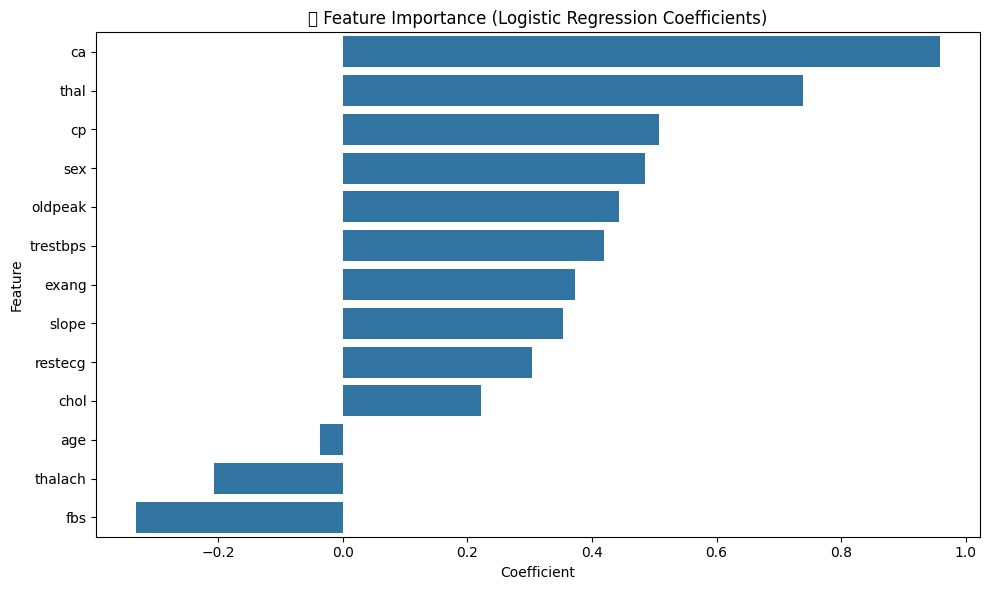

In [40]:
# ---------------------------------------------
# 🧠 Logistic Regression on UCI Heart Disease Dataset (Binary Target, No NaNs)
# ---------------------------------------------

# ✅ Step 1: Import Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc
)

# ---------------------------------------------
# ✅ Step 2: Load the Dataset
# ---------------------------------------------
# Fetch Heart Disease dataset (UCI ID = 45)
heart_disease = fetch_ucirepo(id=45)

# Extract features and target
X = heart_disease.data.features
y = heart_disease.data.targets
y = y.rename(columns={y.columns[0]: 'target'})  # Ensure name is 'target'

# ---------------------------------------------
# ✅ Step 3: Convert Target to Binary Classification
# ---------------------------------------------
# 0 = No heart disease, 1 = Has heart disease (combine 1, 2, 3, 4 into 1)
y['target'] = y['target'].apply(lambda x: 1 if x != 0 else 0)

# ---------------------------------------------
# ✅ Step 4: Remove Rows with Missing Values
# ---------------------------------------------
df = pd.concat([X, y], axis=1)     # Combine X and y to keep alignment
df_clean = df.dropna()             # Drop rows with missing data
X = df_clean.drop('target', axis=1)
y = df_clean['target']

# ---------------------------------------------
# ✅ Step 5: Train-Test Split
# ---------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------------------------
# ✅ Step 6: Standardize Features
# ---------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------------------------
# ✅ Step 7: Train Logistic Regression Model
# ---------------------------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train.values.ravel())

# ---------------------------------------------
# ✅ Step 8: Make Predictions
# ---------------------------------------------
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# ---------------------------------------------
# ✅ Step 9: Evaluate the Model
# ---------------------------------------------
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("\n📊 Evaluation Metrics:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")

# Classification report
print("\n📝 Classification Report:\n", classification_report(y_test, y_pred))

# ---------------------------------------------
# ✅ Step 10: Confusion Matrix (Heatmap)
# ---------------------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("🔍 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ---------------------------------------------
# ✅ Step 11: ROC Curve & AUC Score
# ---------------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("📈 ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------------------------------
# ✅ Step 12: Feature Importance (Bar Chart)
# ---------------------------------------------
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("📊 Feature Importance (Logistic Regression Coefficients)")
plt.tight_layout()
plt.show()


# **Decision Tree:**


📊 Evaluation Metrics (Decision Tree):
Accuracy  : 0.6833
Precision : 0.6800
Recall    : 0.6071
F1-score  : 0.6415

📝 Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.75      0.72        32
           1       0.68      0.61      0.64        28

    accuracy                           0.68        60
   macro avg       0.68      0.68      0.68        60
weighted avg       0.68      0.68      0.68        60



/tmp/ipython-input-2085009784.py:89: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


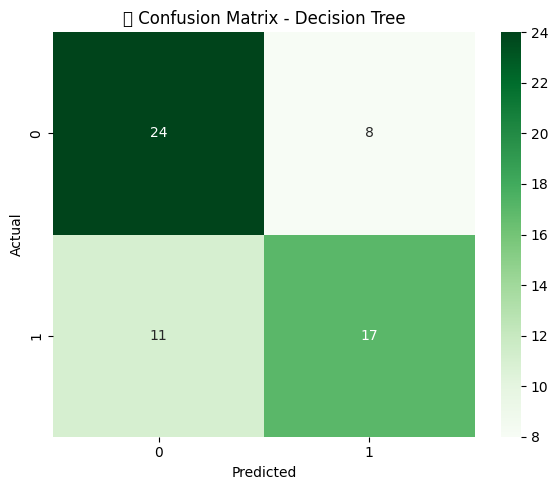

/tmp/ipython-input-2085009784.py:106: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


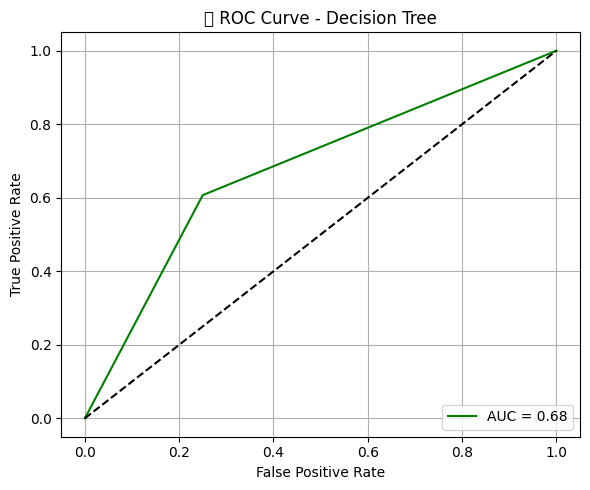

/tmp/ipython-input-2085009784.py:120: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


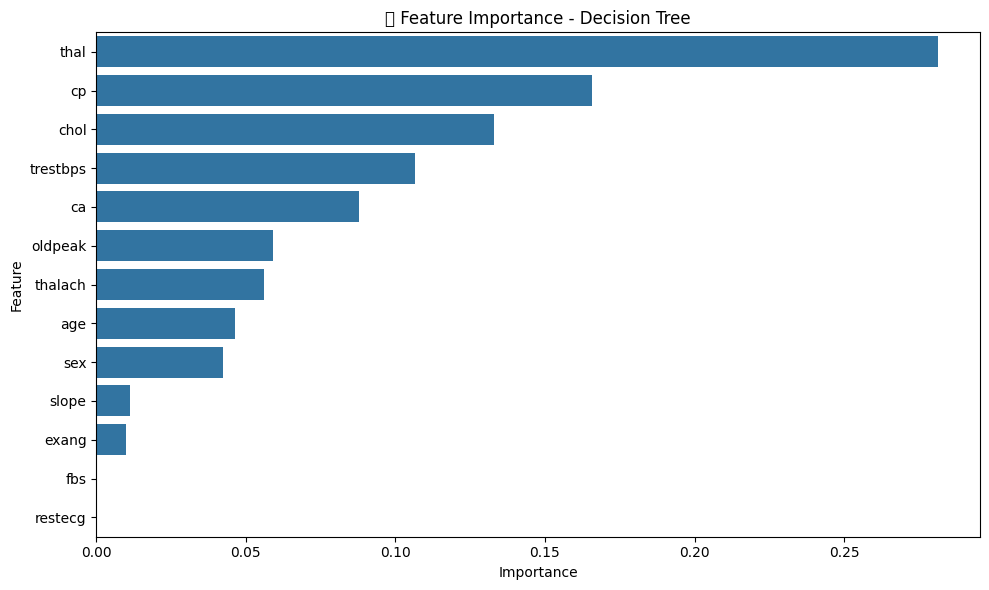

In [42]:
# ---------------------------------------------
# 🌳 Decision Tree on UCI Heart Disease Dataset (Binary Target, No NaNs)
# ---------------------------------------------

# ✅ Step 1: Import Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc
)

# ---------------------------------------------
# ✅ Step 2: Load and Prepare Dataset
# ---------------------------------------------
# Fetch the UCI Heart Disease dataset
heart_disease = fetch_ucirepo(id=45)

# Extract features and target
X = heart_disease.data.features
y = heart_disease.data.targets
y = y.rename(columns={y.columns[0]: 'target'})

# Convert multiclass target to binary: 0 = no disease, 1 = has disease
y['target'] = y['target'].apply(lambda x: 1 if x != 0 else 0)

# Drop rows with missing values
df = pd.concat([X, y], axis=1)
df_clean = df.dropna()
X = df_clean.drop('target', axis=1)
y = df_clean['target']

# ---------------------------------------------
# ✅ Step 3: Train-Test Split
# ---------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------------------------
# ✅ Step 4: Feature Scaling (Optional for Trees, but good for consistency)
# ---------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------------------------
# ✅ Step 5: Train Decision Tree Model
# ---------------------------------------------
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# ---------------------------------------------
# ✅ Step 6: Make Predictions
# ---------------------------------------------
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# ---------------------------------------------
# ✅ Step 7: Evaluate Model
# ---------------------------------------------
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("\n📊 Evaluation Metrics (Decision Tree):")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")
print("\n📝 Classification Report:\n", classification_report(y_test, y_pred))

# ---------------------------------------------
# ✅ Step 8: Confusion Matrix (Heatmap)
# ---------------------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("🔍 Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ---------------------------------------------
# ✅ Step 9: ROC Curve & AUC
# ---------------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("📈 ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------------------------------
# ✅ Step 10: Feature Importance (Bar Chart)
# ---------------------------------------------
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title("📊 Feature Importance - Decision Tree")
plt.tight_layout()
plt.show()


# **Support Vector Machine:**


📊 Evaluation Metrics (SVM):
Accuracy  : 0.8500
Precision : 0.8800
Recall    : 0.7857
F1-score  : 0.8302

📝 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



/tmp/ipython-input-3273195380.py:88: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


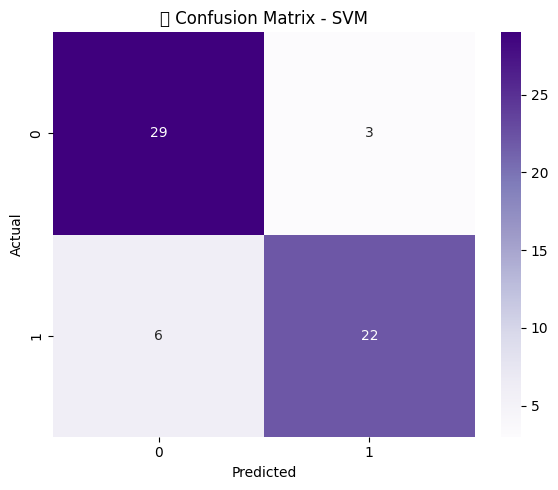

/tmp/ipython-input-3273195380.py:105: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


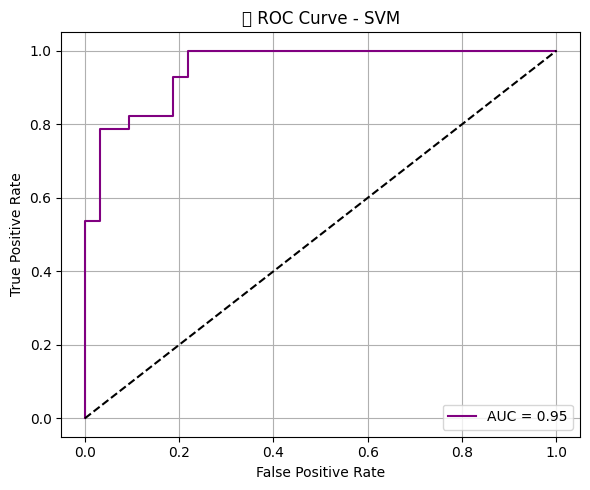

/tmp/ipython-input-3273195380.py:119: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


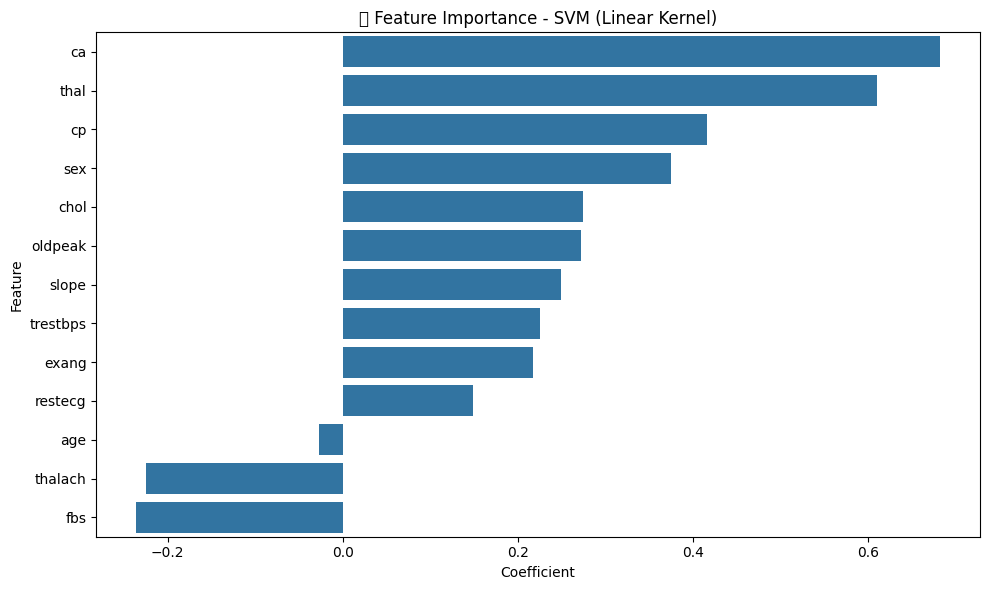

In [43]:
# ---------------------------------------------
# 💠 Support Vector Machine on UCI Heart Disease Dataset
# ---------------------------------------------

# ✅ Step 1: Import Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc
)

# ---------------------------------------------
# ✅ Step 2: Load and Prepare the Dataset
# ---------------------------------------------
heart_disease = fetch_ucirepo(id=45)

# Extract features and target
X = heart_disease.data.features
y = heart_disease.data.targets
y = y.rename(columns={y.columns[0]: 'target'})

# Convert to binary classification: 0 = no disease, 1 = has disease
y['target'] = y['target'].apply(lambda x: 1 if x != 0 else 0)

# Remove rows with missing values
df = pd.concat([X, y], axis=1)
df_clean = df.dropna()
X = df_clean.drop('target', axis=1)
y = df_clean['target']

# ---------------------------------------------
# ✅ Step 3: Train-Test Split
# ---------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------------------------
# ✅ Step 4: Feature Scaling (Very important for SVM)
# ---------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------------------------
# ✅ Step 5: Train SVM Classifier
# ---------------------------------------------
# Use probability=True to enable ROC curve later
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train_scaled, y_train)

# ---------------------------------------------
# ✅ Step 6: Make Predictions
# ---------------------------------------------
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# ---------------------------------------------
# ✅ Step 7: Evaluate Model
# ---------------------------------------------
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n📊 Evaluation Metrics (SVM):")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")
print("\n📝 Classification Report:\n", classification_report(y_test, y_pred))

# ---------------------------------------------
# ✅ Step 8: Confusion Matrix (Heatmap)
# ---------------------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("🔍 Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ---------------------------------------------
# ✅ Step 9: ROC Curve and AUC
# ---------------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("📈 ROC Curve - SVM")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------------------------------
# ✅ Step 10: Feature Importance (Coefficients for Linear SVM)
# ---------------------------------------------
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("📊 Feature Importance - SVM (Linear Kernel)")
plt.tight_layout()
plt.show()


# **Unsupervised Learning:**

/tmp/ipython-input-2590284338.py:64: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


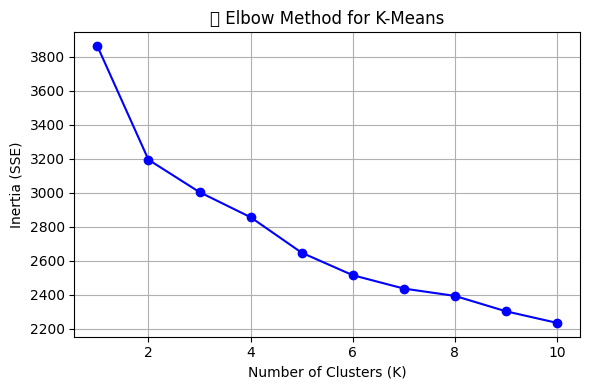

/tmp/ipython-input-2590284338.py:78: UserWarning: Glyph 128310 (\N{LARGE ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128310 (\N{LARGE ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


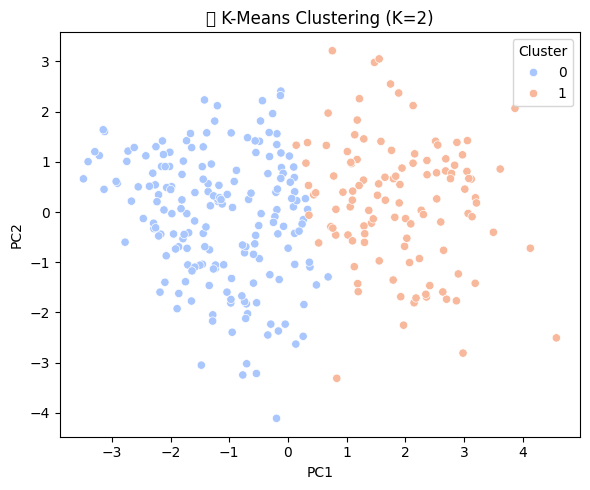

/tmp/ipython-input-2590284338.py:90: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


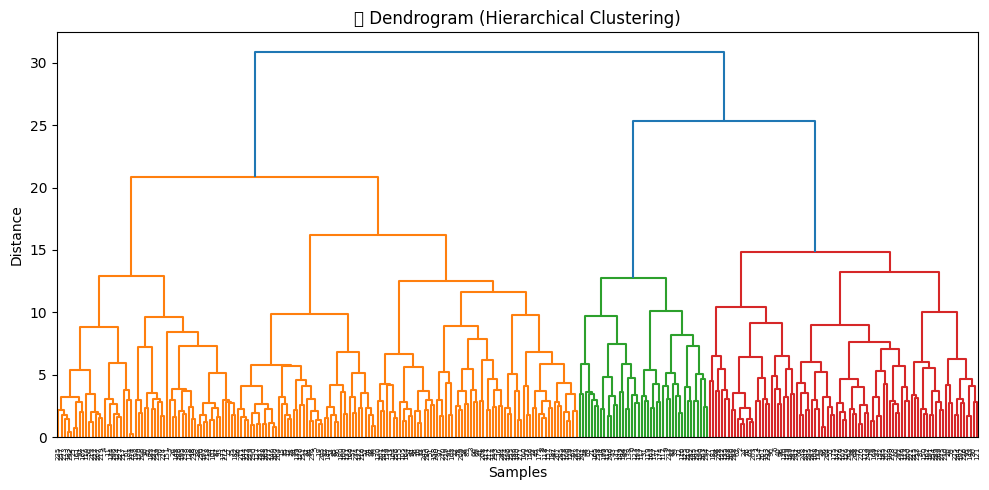

/tmp/ipython-input-2590284338.py:104: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


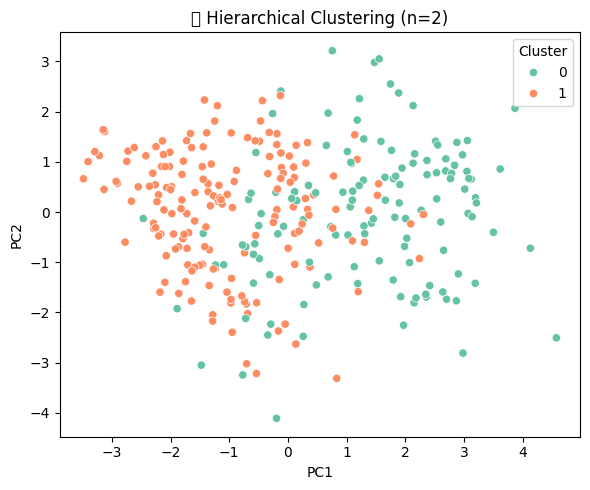

🔁 Confusion Matrix - KMeans vs True Labels:
[[147  13]
 [ 37 100]]

🔁 Confusion Matrix - Hierarchical vs True Labels:
[[ 43 117]
 [ 86  51]]

🎯 Adjusted Rand Index - KMeans:       0.4380
🎯 Adjusted Rand Index - Hierarchical: 0.1317


In [45]:
# ---------------------------------------------
# 🧠 Clustering on UCI Heart Disease Dataset
# Tasks:
# 1. K-Means (with Elbow Method)
# 2. Hierarchical Clustering (Dendrogram)
# 3. Compare Clusters with Actual Labels
# ---------------------------------------------

# ✅ Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import scipy.cluster.hierarchy as sch

# ---------------------------------------------
# ✅ Step 2: Load and Preprocess Dataset
# ---------------------------------------------
# Load UCI Heart Disease dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

# Rename target column and convert to binary
y = y.rename(columns={y.columns[0]: 'target'})
y['target'] = y['target'].apply(lambda x: 1 if x != 0 else 0)

# Remove missing values
df = pd.concat([X, y], axis=1)
df_clean = df.dropna()
X = df_clean.drop('target', axis=1)
y = df_clean['target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction (for plotting only)
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

# ---------------------------------------------
# ✅ Step 3: K-Means Clustering with Elbow Method
# ---------------------------------------------
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (SSE)")
plt.title("📉 Elbow Method for K-Means")
plt.grid(True)
plt.tight_layout()
plt.show()

# Apply K-Means with K=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Visualize K-Means Clustering
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=kmeans_labels, palette='coolwarm')
plt.title("🔶 K-Means Clustering (K=2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# ---------------------------------------------
# ✅ Step 4: Hierarchical Clustering & Dendrogram
# ---------------------------------------------
# Plot Dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("🌳 Dendrogram (Hierarchical Clustering)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# Apply Agglomerative Clustering (Fix applied here ✅)
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

# Visualize Hierarchical Clustering
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=hc_labels, palette='Set2')
plt.title("🔷 Hierarchical Clustering (n=2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# ---------------------------------------------
# ✅ Step 5: Compare Clusters to Actual Labels
# ---------------------------------------------
# Confusion Matrices
print("🔁 Confusion Matrix - KMeans vs True Labels:")
print(confusion_matrix(y, kmeans_labels))

print("\n🔁 Confusion Matrix - Hierarchical vs True Labels:")
print(confusion_matrix(y, hc_labels))

# Adjusted Rand Index
ari_kmeans = adjusted_rand_score(y, kmeans_labels)
ari_hc = adjusted_rand_score(y, hc_labels)

print(f"\n🎯 Adjusted Rand Index - KMeans:       {ari_kmeans:.4f}")
print(f"🎯 Adjusted Rand Index - Hierarchical: {ari_hc:.4f}")


# **Hyperparameter Tuning:**

In [46]:
# ---------------------------------------------
# ⚙️ Hyperparameter Optimization + Baseline Comparison
# Logistic Regression, Decision Tree, SVM
# ---------------------------------------------

# ✅ Step 1: Import Required Libraries
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# ✅ Step 2: Load and Preprocess Dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets
y = y.rename(columns={y.columns[0]: 'target'})
y['target'] = y['target'].apply(lambda x: 1 if x != 0 else 0)
df = pd.concat([X, y], axis=1).dropna()
X = df.drop('target', axis=1)
y = df['target']

# Train/Test Split + Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Helper function to evaluate models
def evaluate_model(model, name):
    y_pred = model.predict(X_test_scaled)
    print(f"\n📊 {name} Results:")
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score : {f1_score(y_test, y_pred):.4f}")
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    }

results = []

# ---------------------------------------------
# ✅ Logistic Regression: Baseline vs GridSearchCV
# ---------------------------------------------
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
results.append(evaluate_model(lr, "LogReg (Baseline)"))

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5)
grid_lr.fit(X_train_scaled, y_train)
results.append(evaluate_model(grid_lr.best_estimator_, "LogReg (GridSearchCV)"))

# ---------------------------------------------
# ✅ Decision Tree: Baseline vs RandomizedSearchCV
# ---------------------------------------------
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
results.append(evaluate_model(dt, "DecisionTree (Baseline)"))

param_dist_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
random_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_dist_dt, cv=5, n_iter=10, random_state=42)
random_dt.fit(X_train_scaled, y_train)
results.append(evaluate_model(random_dt.best_estimator_, "DecisionTree (RandomSearchCV)"))

# ---------------------------------------------
# ✅ SVM: Baseline vs GridSearchCV
# ---------------------------------------------
svm = SVC()
svm.fit(X_train_scaled, y_train)
results.append(evaluate_model(svm, "SVM (Baseline)"))

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_svm.fit(X_train_scaled, y_train)
results.append(evaluate_model(grid_svm.best_estimator_, "SVM (GridSearchCV)"))

# ---------------------------------------------
# ✅ Summary Table
# ---------------------------------------------
summary_df = pd.DataFrame(results)
print("\n📊 Model Comparison Summary:")
print(summary_df.sort_values(by='F1', ascending=False))



📊 LogReg (Baseline) Results:
Accuracy : 0.8333
Precision: 0.8462
Recall   : 0.7857
F1-score : 0.8148

📊 LogReg (GridSearchCV) Results:
Accuracy : 0.8667
Precision: 0.9167
Recall   : 0.7857
F1-score : 0.8462

📊 DecisionTree (Baseline) Results:
Accuracy : 0.6833
Precision: 0.6800
Recall   : 0.6071
F1-score : 0.6415

📊 DecisionTree (RandomSearchCV) Results:
Accuracy : 0.8000
Precision: 0.7857
Recall   : 0.7857
F1-score : 0.7857

📊 SVM (Baseline) Results:
Accuracy : 0.8500
Precision: 0.8800
Recall   : 0.7857
F1-score : 0.8302

📊 SVM (GridSearchCV) Results:
Accuracy : 0.8667
Precision: 0.9167
Recall   : 0.7857
F1-score : 0.8462

📊 Model Comparison Summary:
                           Model  Accuracy  Precision    Recall        F1
1          LogReg (GridSearchCV)  0.866667   0.916667  0.785714  0.846154
5             SVM (GridSearchCV)  0.866667   0.916667  0.785714  0.846154
4                 SVM (Baseline)  0.850000   0.880000  0.785714  0.830189
0              LogReg (Baseline)  0.833333 

# **Model Export & Deployment:**

In [47]:
# ---------------------------------------------
# 💾 Save Trained Pipeline (Scaler + Model)
# ---------------------------------------------

import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import joblib  # Or use: import pickle

# Step 1: Load and clean data
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets
y = y.rename(columns={y.columns[0]: 'target'})
y['target'] = y['target'].apply(lambda x: 1 if x != 0 else 0)

df = pd.concat([X, y], axis=1).dropna()
X = df.drop('target', axis=1)
y = df['target']

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Step 3: Build pipeline (scaling + logistic regression)
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Step 4: Train the pipeline
pipeline.fit(X_train, y_train)

# Step 5: Evaluate (optional)
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Step 6: Save the pipeline
joblib.dump(pipeline, 'heart_disease_model.pkl')  # Saved as .pkl

# Optional with pickle:
# import pickle
# with open('heart_disease_model.pkl', 'wb') as f:
#     pickle.dump(pipeline, f)

print("✅ Model pipeline saved as 'heart_disease_model.pkl'")


Accuracy: 0.8333333333333334
✅ Model pipeline saved as 'heart_disease_model.pkl'


In [48]:
# Load the saved model pipeline
loaded_pipeline = joblib.load('heart_disease_model.pkl')

# Use it for prediction
new_predictions = loaded_pipeline.predict(X_test)  # or new data


# **Streamlit Web UI Development:**

In [50]:
pip install streamlit scikit-learn pandas matplotlib seaborn joblib ucimlrepo


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 106.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [52]:
# ---------------------------------------------
# Streamlit App: Heart Disease Predictor + Data Viz (No Emojis)
# ---------------------------------------------

import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from ucimlrepo import fetch_ucirepo

# ---------------------------------------------
# Load Model and Dataset
# ---------------------------------------------
@st.cache_data
def load_model():
    return joblib.load("heart_disease_model.pkl")

@st.cache_data
def load_data():
    heart_disease = fetch_ucirepo(id=45)
    X = heart_disease.data.features
    y = heart_disease.data.targets
    y = y.rename(columns={y.columns[0]: 'target'})
    y['target'] = y['target'].apply(lambda x: 1 if x != 0 else 0)
    df = pd.concat([X, y], axis=1).dropna()
    return df, X.columns.tolist()

model = load_model()
df, feature_columns = load_data()

# ---------------------------------------------
# Streamlit Page Config
# ---------------------------------------------
st.set_page_config(page_title="Heart Disease Predictor", layout="wide")
st.title("UCI Heart Disease Predictor")
st.markdown("Predict heart disease using your health stats and explore data trends.")

# ---------------------------------------------
# Sidebar User Input
# ---------------------------------------------
st.sidebar.header("Input Your Health Data")

def user_input():
    inputs = {}
    for col in feature_columns:
        val = st.sidebar.number_input(f"{col}", float(df[col].min()), float(df[col].max()), float(df[col].mean()))
        inputs[col] = val
    return pd.DataFrame([inputs])

user_df = user_input()

# ---------------------------------------------
# Prediction Section
# ---------------------------------------------
st.subheader("Real-Time Prediction")
prediction = model.predict(user_df)[0]
prediction_proba = model.predict_proba(user_df)[0][1]

st.write("### Prediction Result:")
if prediction == 1:
    st.error("High risk of heart disease")
else:
    st.success("Low risk of heart disease")

st.progress(int(prediction_proba * 100))
st.write(f"Probability of Heart Disease: {prediction_proba:.2%}")

# ---------------------------------------------
# Data Visualization Section
# ---------------------------------------------
st.subheader("Explore Heart Disease Trends")

col1, col2 = st.columns(2)

with col1:
    st.write("Heart Disease Distribution")
    sns.countplot(data=df, x='target')
    st.pyplot(plt.gcf())
    plt.clf()

with col2:
    st.write("Age vs Cholesterol (Colored by Disease)")
    sns.scatterplot(data=df, x='age', y='chol', hue='target')
    st.pyplot(plt.gcf())
    plt.clf()

st.write("Correlation Heatmap")
corr = df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
st.pyplot(plt.gcf())
plt.clf()


2025-08-08 21:50:05.230 No runtime found, using MemoryCacheStorageManager
2025-08-08 21:50:05.234 No runtime found, using MemoryCacheStorageManager
2025-08-08 21:50:05.239 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 21:50:05.242 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 21:50:05.244 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 21:50:05.246 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 21:50:05.248 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 21:50:05.250 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 21:50:05.252 Thread 'MainThread': missing ScriptRunContext! This warning can be ignor

<Figure size 640x480 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [58]:
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from ucimlrepo import fetch_ucirepo

# ------------------ Load Data and Model ------------------
@st.cache_data
def load_data():
    heart = fetch_ucirepo(id=45)
    X = heart.data.features
    y = heart.data.targets.rename(columns={heart.data.targets.columns[0]: 'target'})
    y['target'] = y['target'].apply(lambda x: 1 if x != 0 else 0)
    df = pd.concat([X, y], axis=1).dropna()
    return df, X.columns.tolist()

@st.cache_data
def load_model():
    return joblib.load("heart_disease_model.pkl")  # Make sure it's trained

df, features = load_data()
model = load_model()

# ------------------ Page Setup ------------------
st.set_page_config("Heart Disease Risk Predictor", layout="wide")
st.title("Heart Disease Risk Analyzer and Predictor")
st.markdown("This project analyzes, predicts, and visualizes heart disease risks using machine learning.")

# ------------------ Sidebar Inputs ------------------
st.sidebar.header("Enter your health data:")
user_data = {}

for feature in features:
    min_val = float(df[feature].min())
    max_val = float(df[feature].max())
    mean_val = float(df[feature].mean())
    user_data[feature] = st.sidebar.slider(label=feature, min_value=min_val, max_value=max_val, value=mean_val)

user_df = pd.DataFrame([user_data])

# ------------------ Prediction ------------------
st.subheader("Prediction Result")

prediction = model.predict(user_df)[0]
proba = model.predict_proba(user_df)[0][1]

if prediction == 1:
    st.error(f"⚠️ High risk of heart disease ({proba:.2%} probability)")
else:
    st.success(f"✅ Low risk of heart disease ({proba:.2%} probability)")

st.progress(int(proba * 100))

# ------------------ Visualizations ------------------
st.subheader("Heart Disease Dataset Visualizations")

col1, col2 = st.columns(2)

with col1:
    st.write("### Distribution of Heart Disease")
    sns.countplot(x="target", data=df)
    st.pyplot(plt.gcf())
    plt.clf()

with col2:
    st.write("### Age vs Cholesterol by Risk")
    sns.scatterplot(data=df, x="age", y="chol", hue="target")
    st.pyplot(plt.gcf())
    plt.clf()

st.write("### Correlation Heatmap")
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
st.pyplot(plt.gcf())
plt.clf()


2025-08-08 22:09:24.619 No runtime found, using MemoryCacheStorageManager
2025-08-08 22:09:24.630 No runtime found, using MemoryCacheStorageManager
2025-08-08 22:09:24.632 No runtime found, using MemoryCacheStorageManager
2025-08-08 22:09:24.635 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 22:09:24.636 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 22:09:24.637 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 22:09:24.637 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 22:09:25.151 Thread 'Thread-7': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 22:09:25.153 Thread 'Thread-7': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 22:09:25.154 Th

In [54]:
!pip install pyngrok


In [59]:
# ---------------------------------------------
# launch_ngrok_colab.py - For Google Colab: Launch Streamlit + Ngrok
# ---------------------------------------------

import os
import time
from pyngrok import ngrok

# ---------------------------------------------
# Step 1: Install dependencies (only needed in Colab)
# ---------------------------------------------
os.system("pip install streamlit pyngrok")

# ---------------------------------------------
# Step 2: Create a simple app if not present
# ---------------------------------------------
if not os.path.exists("app.py"):
    with open("app.py", "w") as f:
        f.write("""
import streamlit as st
st.title('Heart Disease Predictor: ')
st.write('Your Streamlit app is running!')
""")



# ---------------------------------------------
# Step 3: Authenticate Ngrok
# ---------------------------------------------
ngrok.set_auth_token("311Spvm2QEThWEDKLRXldpPkayJ_3Ma6Qtozgy9qD7DiJhQRg")  # Replace this

# ---------------------------------------------
# Step 4: Start Streamlit app in the background
# ---------------------------------------------
os.system("streamlit run app.py &")

# ---------------------------------------------
# Step 5: Wait for Streamlit to start
# ---------------------------------------------
time.sleep(5)

# ---------------------------------------------
# Step 6: Start Ngrok tunnel
# ---------------------------------------------
public_url = ngrok.connect(8501)
print("Streamlit app is running at:", public_url)

# ---------------------------------------------
# Step 7: Keep tunnel open
# ---------------------------------------------
input("Press ENTER to stop the app and close the tunnel...\\n")
ngrok.disconnect(public_url)


Streamlit app is running at: NgrokTunnel: "https://d241ca954127.ngrok-free.app" -> "http://localhost:8501"
Press ENTER to stop the app and close the tunnel...\n
